# Hierarchical clustering

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
df = pd.read_csv('./datasets/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
features = df.loc[:, 'SepalLengthCm':'PetalWidthCm'].values

### Hierachical clustering using scipy

In [4]:
import scipy.cluster.hierarchy as sch

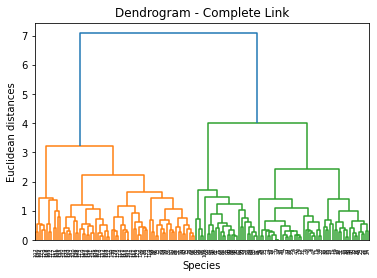

In [5]:
clusters = sch.linkage(features, method="complete")
dendrogram = sch.dendrogram(clusters)
plt.title('Dendrogram - Complete Link')
plt.xlabel('Species')
plt.ylabel('Euclidean distances')
plt.show()

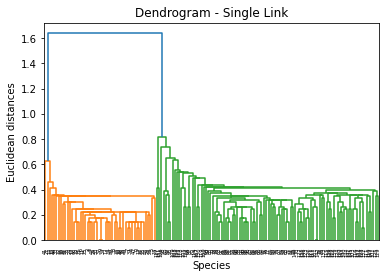

In [6]:
clusters = sch.linkage(features, method="single")
dendrogram = sch.dendrogram(clusters)
plt.title('Dendrogram - Single Link')
plt.xlabel('Species')
plt.ylabel('Euclidean distances')
plt.show()

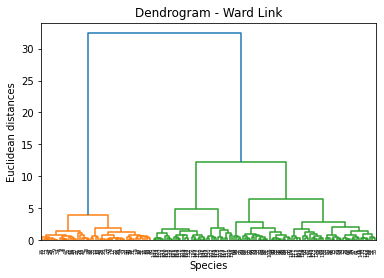

In [7]:
clusters = sch.linkage(features, method="ward")
dendrogram = sch.dendrogram(clusters)
plt.title('Dendrogram - Ward Link')
plt.xlabel('Species')
plt.ylabel('Euclidean distances')
plt.show()

### Optimal number of clusters are 2 for all three cases

### Using sklearn

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(features)
print(y_hc)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### Visualizing clusters

In [10]:
vals = np.concatenate((features, y_hc.reshape(-1,1)), axis=1)
new_df = pd.DataFrame(vals, columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'cluster'])

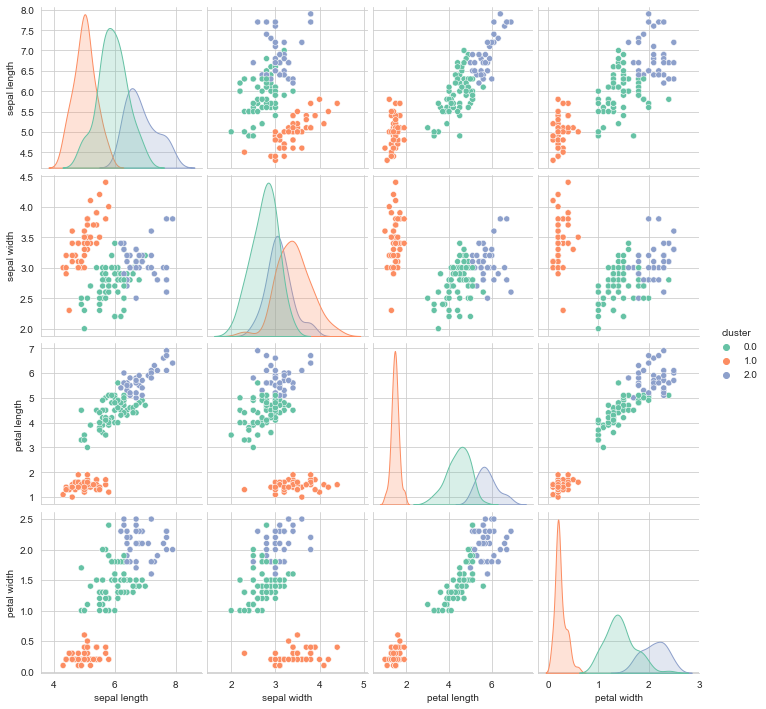

In [12]:
sns.set_style("whitegrid")
sns.pairplot(new_df, hue='cluster', palette="Set2")

### Birch clustering

In [13]:
from sklearn.cluster import Birch

In [14]:
brc = Birch(n_clusters=3)
brc.fit(features)

Birch()

In [15]:
clusters = brc.fit_predict(features)
print(clusters)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


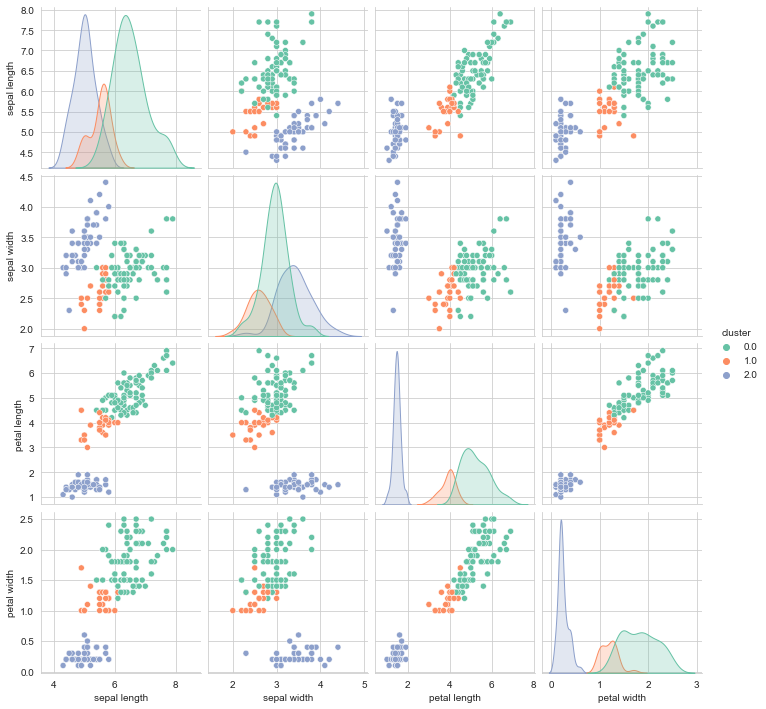

In [16]:
vals = np.concatenate((features, clusters.reshape(-1,1)), axis=1)
new_df = pd.DataFrame(vals, columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'cluster'])
sns.pairplot(new_df, hue='cluster', palette="Set2")